In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('./Datasets/exp_4.csv')

In [3]:
df.shape

(400, 3)

In [4]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [7]:
df.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [9]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [11]:
col_transformers = ColumnTransformer(
    transformers=[
        ('scaling',StandardScaler(),[0,1])
    ],
    remainder='passthrough'
)

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=6)
pipe = Pipeline(
    [
        ('scaling',col_transformers),
        ('model',SVC())
    ]
)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)

In [13]:
print(f'Train score: {round(pipe.score(x_train,y_train),2)}')
print(f'Test score: {round(pipe.score(x_test,y_test),2)}')

Train score: 0.91
Test score: 0.94


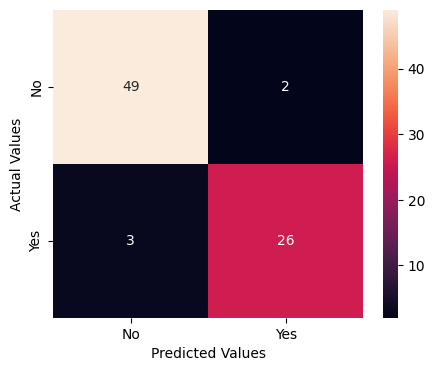

In [14]:
cm = confusion_matrix(y_pred,y_test)
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,xticklabels=['No','Yes'],yticklabels=['No','Yes'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [15]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        51
           1       0.93      0.90      0.91        29

    accuracy                           0.94        80
   macro avg       0.94      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



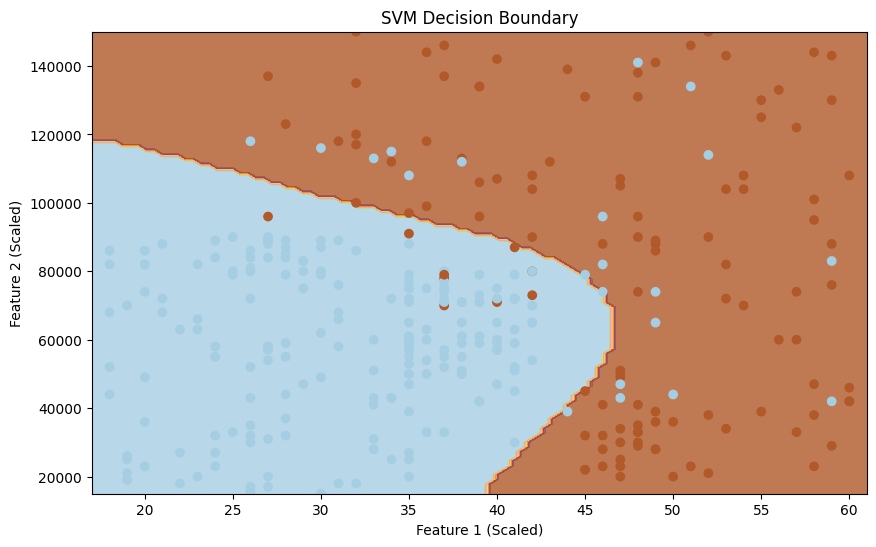

In [25]:
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = pipe.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.title('SVM Decision Boundary')
plt.show()
